<a href="https://colab.research.google.com/github/schmuecker/machine-learning-course/blob/main/01%20explorative-analysis-pca/01.1%20explorative%20analysis/%C3%9Cbung_1.1_Explorative_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explorative Datenanalyse: Häusermarkt in Boston
==============================================================================================


## Einbinden von packages
Import zweier Standardpakete für die Datenanalyse: Numpy für mehrdimensionale Arrays, Pandas für Datenanalyse in Tabellen.
Import von der matplotlib.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.__version__, pd.__version__

('1.19.5', '1.1.5')

## Einlesen der Data

Idealerweise sind die noteboks standalone. Im ersten Schritt werden die Daten eingelesen.

#### Direkter Download
Direkter Download vom USGS, Abruf des Downloaddatums, automatischer Import in Pandas-Dataframe. 

In [2]:
fileUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']

eData = pd.read_csv(fileUrl, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

dateDownloaded = !date #Calling Linux
dateDownloaded

['Wed Oct 27 15:21:27 UTC 2021']

#### Caching 

In [3]:
import os
if not os.path.isfile('housing.data'):
    !pip install wget #Installation of wget
    import wget
    print("Downloading file...\n")
    wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 'housing.data')
else:
    print("File exists\n")
!ls -11

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f98938e69f1c46ba131f0febd5b670f15b1828a91109465d453e62fd5c95afe9
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

housing.data
sample_data


### Darstellung als Pandas-DataFrame
-----------------------------------

Darstellung des Datensatzes als Datensatzes als Pandas-Dataframe (Tabelle der ersten und letzten 30 Einträge, Anzahl Reihen und Spalten). Konvention: Variablen sind die Spalten, einzelne Messungen die Zeilen.

In [4]:
eData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Kürzere Darstellung mit head(): nur die ersten 5 Einträge des Tabellenkopfes

In [5]:
eData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Anzahl der Reihen und Spalten mit Numpy shape().

In [6]:
np.shape(eData)

(506, 14)

Anzeige der einzelnen Spaltennamen mit Attribut DataFrame.columns

In [7]:
eData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

Datentyp der einzelnen Variablen mit Attribut DataFrame.dtypes

In [8]:
eData.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

2. Aufbereitung des Datensatzes
-------------------------------

Überprüfen, ob Tabelle NaN enthält, mit DataFrame.isnull().any()

In [9]:
eData.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Entfernung aller Zeilen bzw. Messungen mit NaNs durch DataFrame.dropna()

In [10]:
eData = eData.dropna()
eData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
eData.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Überprüfen, ob Zeilen bzw. Messungen doppelt vorkommen, mit DataFrame.duplicated()

In [12]:
eData.duplicated().any()

False

Es kommen also keine Duplikate vor. Bei Bedarf mit *DataFrame.drop_duplicates()* entfernen.

3. Explorative Statistiken
--------------------------

Statistische Beschreibung der numerischen Variablen mit Dataframe.describe() (count: Anzahl Messungen, mean: Mittelwert, std: Standardabweichung, min: Minimum, 25%: 25-Perzentil, ...)

In [13]:
eData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Streumatrix für alle numerischen Variablen mit Pandas *scattermatrix()*:

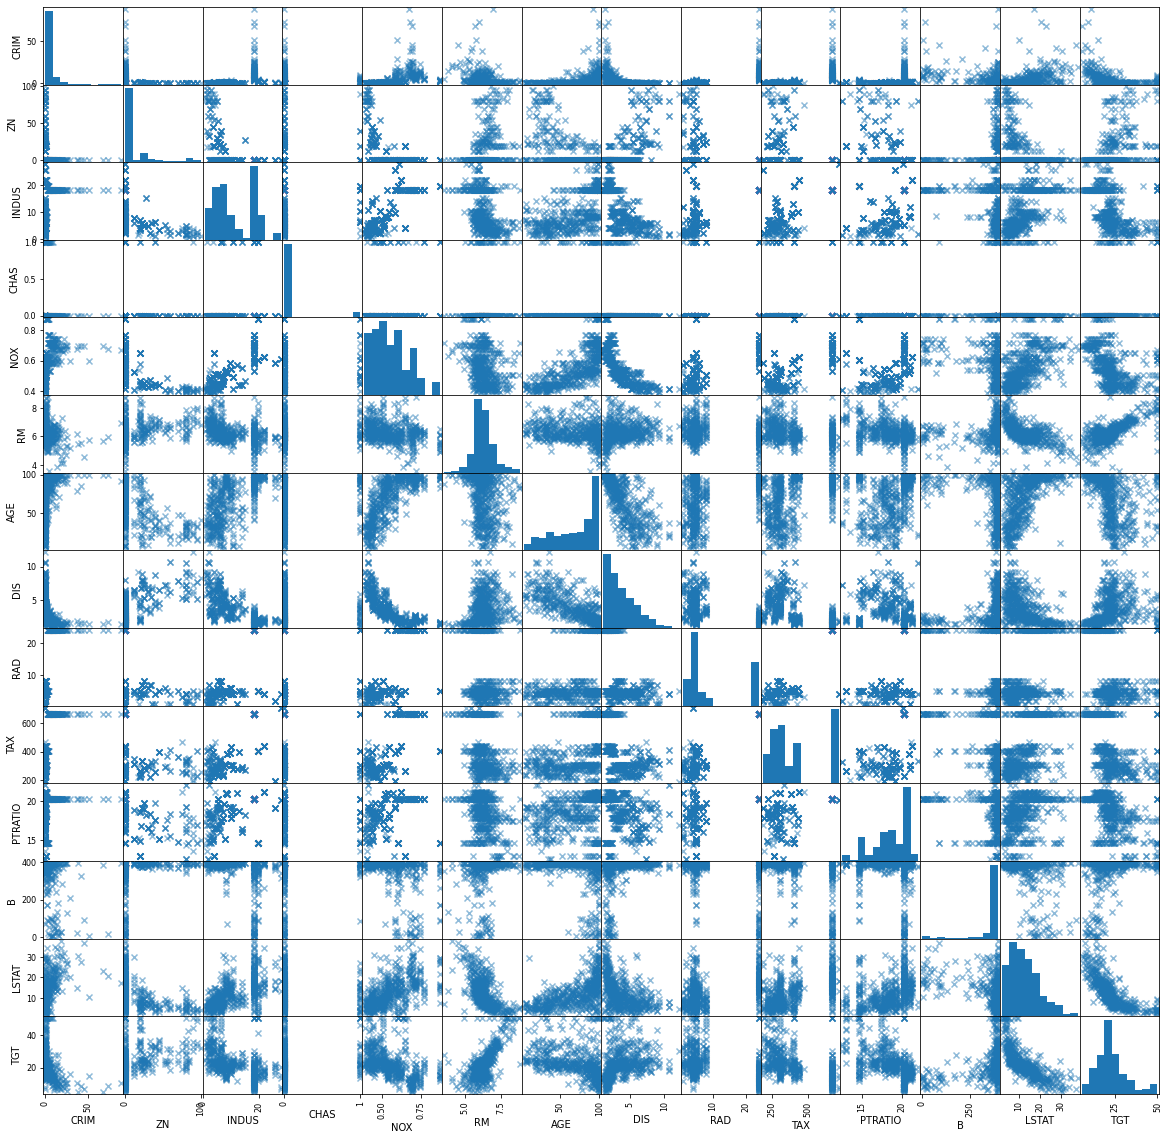

In [14]:
pd.plotting.scatter_matrix(eData, figsize=(20,20), marker='x');

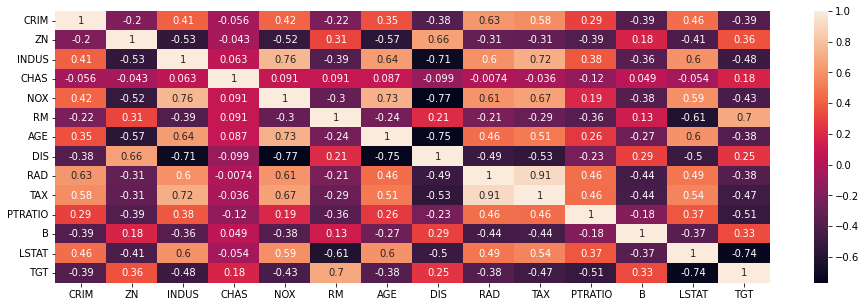

In [29]:
corr = eData.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

4. Analyse von Untermengen
--------------------------

Zugriff auf die Variable 'CRIM' (per capita crime rate by town):

In [15]:
eData['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

Welche Häuser haben eine Crime Rate von über 50 pro Einwohner?

In [16]:
eData['CRIM'] > 50.0

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: CRIM, Length: 506, dtype: bool

Gab es überhaupt Häuser mit einer Crime Rate oberhalb 50?

In [17]:
(eData['CRIM'] > 50.0).any()

True

Gab es also. Haben alle Häuser eine Crime Rate größer als 50?

In [18]:
(eData['CRIM'] > 50.0).all()

False

Es existieren also auch Häuser mit Crime Rate unterhalb von 50.

In [19]:
keys = eData.keys()
for key in keys:
  print(key + ': ' + str(len(eData[key].unique())) + " uniques")

CRIM: 504 uniques
ZN: 26 uniques
INDUS: 76 uniques
CHAS: 2 uniques
NOX: 81 uniques
RM: 446 uniques
AGE: 356 uniques
DIS: 412 uniques
RAD: 9 uniques
TAX: 66 uniques
PTRATIO: 46 uniques
B: 357 uniques
LSTAT: 455 uniques
TGT: 229 uniques


Häufigkeit der verschiedenen Werte in Radial Highway Anbindung mit Dataframe['RAD'].*value_counts()*:

In [20]:
eData['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

Häufigkeit von Wertepaaren der beiden kategorischen Variablen 'CHAS' und 'RAD' mit Pandas *crosstab()*:

In [21]:
pd.crosstab(eData['CHAS'], eData['RAD'])

RAD,1,2,3,4,5,6,7,8,24
CHAS,,,,,,,,,
0,19,24,36,102,104,26,17,19,124
1,1,0,2,8,11,0,0,5,8


Darstellung der Häufigkeitsverteilung der Erreichbarkeit einer Autobahn für Flussproximität mit einer Kastengraphik durch Pandas *boxplot()*:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


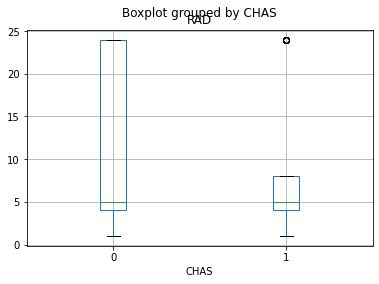

In [22]:
pd.DataFrame.boxplot(eData, column='RAD', by='CHAS');

In [23]:
pip install version-information

  Created wheel for version-information: filename=version_information-1.0.4-py3-none-any.whl size=3897 sha256=c5c28d230c9e219b63c842240a254e96cb3a74b51a7a836824c1a9d6e340eb26
  Stored in directory: /root/.cache/pip/wheels/4e/53/a7/dd2201446de224470b2e086457692a1565f2d98753aae0986d
Successfully built version-information


In [24]:
%load_ext version_information

In [25]:
%version_information

Software versions
Python 3.7.12 64bit [GCC 7.5.0]
IPython 5.5.0
OS Linux 5.4.104+ x86_64 with Ubuntu 18.04 bionic
Wed Oct 27 15:21:51 2021 UTC

In [26]:
%version_information numpy, pandas

Software versions
Python 3.7.12 64bit [GCC 7.5.0]
IPython 5.5.0
OS Linux 5.4.104+ x86_64 with Ubuntu 18.04 bionic
numpy 1.19.5
pandas 1.1.5
Wed Oct 27 15:21:51 2021 UTC